In [1]:
# data manipulation library
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

# web scraping libraries
from bs4 import BeautifulSoup
import requests

# visualization libraries
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# modeling libraries
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm


pd.set_option('display.max_rows',250)
pd.set_option('display.max_columns',200)
pd.set_option('display.max_seq_items',200)

# Data Analysis

In [2]:
# load the saved data
AHG_data_final = pd.read_csv('AHG_data_final.csv')
Data_desc = pd.read_csv('Data Glossary.csv')

In [3]:
AHG_data_final.head()

Year  Zipcode  SIMULATED_SALES Total population Housing units  \
0  2017    38122     1.158712e+07           25,270        11,315   
1  2017    30518     9.483031e+06           45,211        16,972   
2  2017    43614     7.325231e+06           29,290        14,667   
3  2017    85282     6.567164e+06           48,671        23,136   
4  2017    38125     6.803906e+06           36,150        14,249   

   Land area(sq. miles) Density(people per sq. mile)  Water area(sq. miles)  \
0                  7.54                     3,351.46                   0.00   
1                 39.74                     1,137.67                   7.20   
2                  9.03                     3,243.63                   0.36   
3                 11.18                     4,353.40                   0.02   
4                 19.08                     1,894.65                   0.00   

     Male  Female  Median_Age_Male  Median_Age_Female Total households  \
0  12,827  12,443             30.9               33.6            9,791   
1  22,227  22,984             33.5               35.6           15,468   
2  13,740  15,550             37.3               42.4           13,595   
3  24,983  23,688             29.3               32.4           21,121   
4  16,956  19,194             32.1               35.4           13,173   

  Family households Nonfamily households Average household size  \
0             5,787                4,004                   2.58   
1            11,653                3,815                   2.91   
2             7,501                6,094                   2.13   
3            10,168               10,953                   2.29   
4             9,612                3,561                   2.74   

  Average family size Total housing units Occupied housing units  \
0                3.25              11,315                  9,791   
1                3.36              16,972                 15,468   
2                2.81              14,667                 13,595   
3                2.95              23,136                 21,121   
4                3.23              14,249                 13,173   

  Owner-occupied Renter-occupied Vacant housing units Age Under 5 years  \
0          5,345           4,446                1,524             2,282   
1         11,838           3,630                1,504             3,850   
2          7,985           5,610                1,072             1,837   
3         10,020          11,101                2,015             2,500   
4          9,247           3,926                1,076             2,395   

  Age 5 to 9 years Age 10 to 14 years Age 15 to 19 years Age 20 to 24 years  \
0            1,868              1,559              1,537              2,035   
1            4,015              3,640              3,017              2,160   
2            1,546              1,494              1,633              2,090   
3            2,272              2,281              3,003              8,221   
4            2,689              3,126              3,047              2,399   

  Age 25 to 34 years Age 35 to 44 years Age 45 to 54 years Age 55 to 59 years  \
0              4,448              3,372              3,173              1,442   
1              6,157              7,923              6,467              2,303   
2              4,330              3,358              4,054              2,101   
3              9,108              5,390              5,480              2,427   
4              4,928              6,352              5,278              2,161   

  Age 60 to 64 years Age 65 to 74 years Age 75 to 84 years  \
0              1,018              1,200                901   
1              1,767              2,173              1,229   
2              1,848              2,133              1,908   
3              2,081              2,942              1,925   
4              1,651              1,462                515   

  Age 85 years and over Median age   White Hispanic or Latino  \
0          

In [4]:
AHG_data_final.dtypes

Year                                                                                     int64
Zipcode                                                                                  int64
SIMULATED_SALES                                                                        float64
Total population                                                                        object
Housing units                                                                           object
Land area(sq. miles)                                                                   float64
Density(people per sq. mile)                                                            object
Water area(sq. miles)                                                                  float64
Male                                                                                    object
Female                                                                                  object
Median_Age_Male                                   

In [5]:
# removing the zipcode that does not have any information
AHG_data_final = AHG_data_final[AHG_data_final.Zipcode != 16565]

In [6]:
AHG_data_final.Year.value_counts(ascending=True)

2017    147
2018    175
2019    207
2020    210
Name: Year, dtype: int64

In [7]:
AHG_data_final.rename(columns= {'SIMULATED_SALES':'Sales'}, inplace = True)

In [8]:
AHG_data_final['Year'] = AHG_data_final['Year'].astype(str)

In [9]:
AHG_data_final.dtypes

Year                                                                                    object
Zipcode                                                                                  int64
Sales                                                                                  float64
Total population                                                                        object
Housing units                                                                           object
Land area(sq. miles)                                                                   float64
Density(people per sq. mile)                                                            object
Water area(sq. miles)                                                                  float64
Male                                                                                    object
Female                                                                                  object
Median_Age_Male                                   

In [10]:
AHG_data_final.isnull().sum()

Year                                                                                    0
Zipcode                                                                                 0
Sales                                                                                   0
Total population                                                                        0
Housing units                                                                           0
Land area(sq. miles)                                                                    0
Density(people per sq. mile)                                                            0
Water area(sq. miles)                                                                   0
Male                                                                                    0
Female                                                                                  0
Median_Age_Male                                                                         0
Median_Age

In [11]:
AHG_data_final.shape

(739, 105)

In [12]:
# drop the null values
AHG_data_final.dropna(inplace = True)

In [13]:
AHG_data_final.shape

(705, 105)

In [14]:
# removing the duplicate columns
drop_cols = ['Civilian employed population(16 years and over).1',
            'Civilian employed population(16 years and over).2','Total households.1','Housing units']
AHG_data_final.drop(columns=drop_cols, inplace=True)

In [15]:
AHG_data_final.shape

(705, 101)

In [16]:
# function that clean the data by replace the unneccessary characters
def data_cleaning(data, cols):
    for i in cols:
        if i not in unimp_cols:
            if data[i].dtype == object and data[i].dtype != float:
                data[i] = data[i].apply(lambda x: str(x).replace('$','').replace(',','').replace('●','').replace('min.','').replace('%',''))
                data[i] = data[i].apply(float)
        
unimp_cols = ['Year','Zipcode','Name','Address','State','City']
data_cleaning(AHG_data_final, AHG_data_final.columns)

In [17]:
AHG_data_final.head()

Year  Zipcode         Sales  Total population  Land area(sq. miles)  \
0  2017    38122  1.158712e+07           25270.0                  7.54   
1  2017    30518  9.483031e+06           45211.0                 39.74   
2  2017    43614  7.325231e+06           29290.0                  9.03   
4  2017    38125  6.803906e+06           36150.0                 19.08   
5  2017    78577  8.958021e+06           70840.0                 31.75   

   Density(people per sq. mile)  Water area(sq. miles)     Male   Female  \
0                       3351.46                   0.00  12827.0  12443.0   
1                       1137.67                   7.20  22227.0  22984.0   
2                       3243.63                   0.36  13740.0  15550.0   
4                       1894.65                   0.00  16956.0  19194.0   
5                       2231.18                   0.11  33982.0  36858.0   

   Median_Age_Male  Median_Age_Female  Total households  Family households  \
0             30.9               33.6            9791.0             5787.0   
1             33.5               35.6           15468.0            11653.0   
2             37.3               42.4           13595.0             7501.0   
4             32.1               35.4           13173.0             9612.0   
5             26.5               29.3           19814.0            16504.0   

   Nonfamily households  Average household size  Average family size  \
0                4004.0                    2.58                 3.25   
1                3815.0                    2.91                 3.36   
2                6094.0                    2.13                 2.81   
4                3561.0                    2.74                 3.23   
5                3310.0                    3.57                 3.96   

   Total housing units  Occupied housing units  Owner-occupied  \
0              11315.0                  9791.0          5345.0   
1              16972.0                 15468.0         11838.0   
2              14667.0                 13595.0          7985.0   
4              14249.0                 13173.0          9247.0   
5              22936.0                 19814.0         12942.0   

   Renter-occupied  Vacant housing units  Age Under 5 years  Age 5 to 9 years  \
0           4446.0                1524.0             2282.0            1868.0   
1           3630.0                1504.0             3850.0            4015.0   
2           5610.0                1072.0             1837.0            1546.0   
4           3926.0                1076.0             2395.0            2689.0   
5           6872.0                3122.0             7189.0            7389.0   

   Age 10 to 14 years  Age 15 to 19 years  Age 20 to 24 years  \
0              1559.0              1537.0              2035.0   
1              3640.0              3017.0              2160.0   
2              1494.0              1633.0              2090.0   
4              3126.0              3047.0              2399.0   
5              6737.0              6082.0              4924.0   

   Age 25 to 34 years  Age 35 to 44 years  Age 45 to 54 years  \
0              4448.0              3372.0              3173.0   
1              6157.0              7923.0              6467.0   
2              4330.0              3358.0              4054.0   
4              4928.0              6352.0              5278.0   
5             10390.0              9134.0              6580.0   

   Age 55 to 59 years  Age 60 to 64 years  Age 65 to 74 years  \
0              1442.0              1018.0              1200.0   
1              2303.0              1767.0              2173.0   
2              2101.0              1848.0              2133.0   
4              2161.0              1651.0              1462.0   
5              2796.0              2532.0              3835.0   

   Age 75 to 84 years  Age 85 years and over  Median age    White  \
0               901.0                  435.0        32.2  12732.0   
1   

In [18]:
AHG_data_final.dtypes

Year                                                                                    object
Zipcode                                                                                  int64
Sales                                                                                  float64
Total population                                                                       float64
Land area(sq. miles)                                                                   float64
Density(people per sq. mile)                                                           float64
Water area(sq. miles)                                                                  float64
Male                                                                                   float64
Female                                                                                 float64
Median_Age_Male                                                                        float64
Median_Age_Female                                 

In [19]:
AHG_data_final.columns.get_loc('Income Less than $10,000')

81

In [20]:
AHG_data_final.columns.get_loc('Income $200,000 or more')

90

In [21]:
AHG_data_final.columns.get_loc('Age Under 5 years')

21

In [22]:
AHG_data_final.columns.get_loc('Age 85 years and over')

33

In [23]:
AHG_data_final.iloc[:, 21:34]

Age Under 5 years  Age 5 to 9 years  Age 10 to 14 years  \
0               2282.0            1868.0              1559.0   
1               3850.0            4015.0              3640.0   
2               1837.0            1546.0              1494.0   
4               2395.0            2689.0              3126.0   
5               7189.0            7389.0              6737.0   
..                 ...               ...                 ...   
738             4224.0            3855.0              3533.0   
739              814.0             911.0              1144.0   
740             3176.0            2602.0              2241.0   
741             5525.0            5971.0              5785.0   
742             2381.0            2341.0              2626.0   

     Age 15 to 19 years  Age 20 to 24 years  Age 25 to 34 years  \
0                1537.0              2035.0              4448.0   
1                3017.0              2160.0              6157.0   
2                1633.0              2090.0              4330.0   
4                3047.0              2399.0              4928.0   
5                6082.0              4924.0             10390.0   
..                  ...                 ...                 ...   
738              5621.0              7920.0              9828.0   
739              1142.0               804.0              1618.0   
740              5065.0              8021.0              8948.0   
741              4557.0              2835.0              9053.0   
742              2841.0              2689.0              4699.0   

     Age 35 to 44 years  Age 45 to 54 years  Age 55 to 59 years  \
0                3372.0              3173.0              1442.0   
1                7923.0              6467.0              2303.0   
2                3358.0              4054.0              2101.0   
4                6352.0              5278.0              2161.0   
5                9134.0              6580.0              2796.0   
..                  ...                 ...                 ...   
738              8514.0              7381.0              3132.0   
739              2552.0              3451.0              1604.0   
740              5715.0              6016.0              2840.0   
741             12466.0              9545.0              2944.0   
742              5159.0              5689.0              2534.0   

     Age 60 to 64 years  Age 65 to 74 years  Age 75 to 84 years  \
0                1018.0              1200.0               901.0   
1                1767.0              2173.0              1229.0   
2                1848.0              2133.0              1908.0   
4                1651.0              1462.0               515.0   
5                2532.0              3835.0              2493.0   
..                  ...                 ...                 ...   
738              2542.0              2589.0              1352.0   
739              1632.0              2033.0              1035.0   
740              2377.0              3514.0              2783.0   
741              2217.0              2536.0              1177.0   
742              2414.0              3204.0              1669.0   

     Age 85 years and over  
0                    435.0  
1                    510.0  
2                    958.0  
4                    147.0  
5                    759.0  
..                     ...  
738                  641.0  
739                  417.0  
740                 1654.0  
741                  488.0  
742                  674.0  

[705 rows x 13 columns]

In [24]:
AHG_data_final.iloc[:, 81:91]

Income Less than $10,000  Income $10,000 to $14,999  \
0                       856.0                      638.0   
1                       618.0                      598.0   
2                      1233.0                      753.0   
4                       389.0                      330.0   
5                      2602.0                     2259.0   
..                        ...                        ...   
738                    2057.0                     1451.0   
739                     380.0                      192.0   
740                    2041.0                     1823.0   
741                     343.0                      435.0   
742                     543.0                      480.0   

     Income $15,000 to $24,999  Income $25,000 to $34,999  \
0                       1734.0                     1475.0   
1                       1222.0                     1216.0   
2                       1567.0                     1598.0   
4                        773.0                     1266.0   
5                       3263.0                     2570.0   
..                         ...                        ...   
738                     2979.0                     2381.0   
739                      433.0                      534.0   
740                     3405.0                     3377.0   
741                     1015.0                     1488.0   
742                     1109.0                     2137.0   

     Income $35,000 to $49,999  Income $50,000 to $74,999  \
0                       1697.0                     1674.0   
1                       2065.0                     2330.0   
2                       1977.0                     2677.0   
4                       1708.0                     3176.0   
5                       2862.0                     2654.0   
..                         ...                        ...   
738                     3057.0                     3779.0   
739                      902.0                     1245.0   
740                     4215.0                     4500.0   
741                     2132.0                     4631.0   
742                     2868.0                     3184.0   

     Income $75,000 to $99,999  Income $100,000 to $149,999  \
0                        878.0                        592.0   
1                       2461.0                       2549.0   
2                       1723.0                       1263.0   
4                       2060.0                       2150.0   
5                       1576.0                        976.0   
..                         ...                          ...   
738                     2896.0                       3727.0   
739                      902.0                       1605.0   
740                     2014.0                       1423.0   
741                     3610.0                       5268.0   
742                     1993.0                       1719.0   

     Income $150,000 to $199,999  Income $200,000 or more  
0                           29.0                     33.0  
1                          989.0                    603.0  
2                          265.0                    255.0  
4                          451.0                    422.0  
5                          435.0                     62.0  
..                           ...                      ...  
738                       1018.0                    451.0  
739                        760.0                   1046.0  
740                        353.0                    137.0  
741                       2150.0                   1060.0  
742                        568.0                    559.0  

[705 rows x 10 columns]

In [25]:
AHG_data_final.iloc[:, 88:91]

Income $100,000 to $149,999  Income $150,000 to $199,999  \
0                          592.0                         29.0   
1                         2549.0                        989.0   
2                         1263.0                        265.0   
4                         2150.0                        451.0   
5                          976.0                        435.0   
..                           ...                          ...   
738                       3727.0                       1018.0   
739                       1605.0                        760.0   
740                       1423.0                        353.0   
741                       5268.0                       2150.0   
742                       1719.0                        568.0   

     Income $200,000 or more  
0                       33.0  
1                      603.0  
2                      255.0  
4                      422.0  
5                       62.0  
..                       ...  
738                    451.0  
739                   1046.0  
740                    137.0  
741                   1060.0  
742                    559.0  

[705 rows x 3 columns]

In [26]:
# squeezing the income columns into three categories 
AHG_data_final['Low_Income'] = AHG_data_final.iloc[:, 81:86].sum(axis = 1) # income level below 25000
AHG_data_final['Medium_Income'] = AHG_data_final.iloc[:, 86:88].sum(axis = 1) # income level between 25k to 100k
AHG_data_final['High_Income'] = AHG_data_final.iloc[:, 88:91].sum(axis = 1) # income level above 100k

In [27]:
# squeezing the age columns into three age categories
AHG_data_final['minor'] = AHG_data_final.iloc[:, 21:25].sum(axis = 1) # age below 20
AHG_data_final['adults'] = AHG_data_final.iloc[:, 25:29].sum(axis = 1) # age between 20 to 55
AHG_data_final['senior'] = AHG_data_final.iloc[:, 29:34].sum(axis = 1) # age above 55

In [28]:
# drop_cols = ['Age Under 5 years', 'Age 5 to 9 years', 'Age 10 to 14 years',
#        'Age 15 to 19 years', 'Age 20 to 24 years', 'Age 25 to 34 years',
#        'Age 35 to 44 years', 'Age 45 to 54 years', 'Age 55 to 59 years',
#        'Age 60 to 64 years', 'Age 65 to 74 years', 'Age 75 to 84 years',
#        'Age 85 years and over','Income Less than $10,000',
#        'Income $10,000 to $14,999', 'Income $15,000 to $24,999',
#        'Income $25,000 to $34,999', 'Income $35,000 to $49,999',
#        'Income $50,000 to $74,999', 'Income $75,000 to $99,999',
#        'Income $100,000 to $149,999', 'Income $150,000 to $199,999',
#        'Income $200,000 or more']
# AHG_2020_M.drop(columns=drop_cols, axis = 1, inplace=True)

In [29]:
AHG_data_final.shape

(705, 107)

In [30]:
AHG_data_final.Zipcode.nunique()

206

## Business Questions

1. Does number of homeowner and renter has an impact of at home store sales?

2. Is higher mean and median income of household indicating higher spending power and interest in home décor products?

3. Does stores with higher adults and younger age population area perform well in sales?

4. How does the educational and occupational characteristics correlate with the product sales?

5. How does the ethnicity affect the spending habits in the home décor products?

6. is housing ownership and rate of housing turnover an important factor for retailers to consider?

In [31]:
# function that returns the percentage value of columns in respect to total population of that zipcode area
def percent(data, cols, total_feature):
    for i in cols:
        data[i + ' percent'] = round(data[i] / data[total_feature],3)
        

cols = ['Age Under 5 years','Age 5 to 9 years', 'Age 10 to 14 years', 'Age 15 to 19 years','Age 20 to 24 years',
        'Age 25 to 34 years','Age 35 to 44 years','Age 45 to 54 years', 'Age 55 to 59 years','Age 60 to 64 years',
        'Age 65 to 74 years','Age 75 to 84 years','Age 85 years and over',
        'minor','adults','senior','White','Hispanic or Latino',
        'Black or African American','Asian','American Indian & Alaska Native',
        'Native Hawaiian & Other Pacific Islander','Other (One Race)','Two or More Races','Male', 'Female']

percent(AHG_data_final, cols, 'Total population')

In [32]:
cols = ['Low_Income','Medium_Income','High_Income','Income Less than $10,000',
        'Income $10,000 to $14,999', 'Income $15,000 to $24,999',
        'Income $25,000 to $34,999', 'Income $35,000 to $49,999',
        'Income $50,000 to $74,999', 'Income $75,000 to $99,999',
        'Income $100,000 to $149,999', 'Income $150,000 to $199,999',
        'Income $200,000 or more']

def percent1(data, cols):
    for i in cols:
        data[i + ' percent'] = round(data[i] / (data['Low_Income'] + data['Medium_Income'] +data['High_Income']),3)
percent1(AHG_data_final, cols)

In [33]:
cols = ['Family households','Nonfamily households']
percent(AHG_data_final, cols, 'Total households')

In [34]:
cols = ['Occupied housing units','Vacant housing units']
percent(AHG_data_final, cols,'Total housing units')

In [35]:
cols = ['Owner-occupied','Renter-occupied']
percent(AHG_data_final, cols,'Occupied housing units')

In [36]:
cols = ['Civilian labor force','Armed Forces','Not in labor force']
percent(AHG_data_final, cols,'Population(16 years and over)')

In [37]:
cols = ['Employed','Unemployed']
percent(AHG_data_final, cols,'Civilian labor force')

In [38]:
cols = ['Drove alone','Carpooled','Public transportation(excluding taxicab)','Walked','Other means','Worked at home']
percent(AHG_data_final, cols, 'Workers(16 years and over)')

In [39]:
cols = ['Management / business / science / arts','Service','Sales / office','Natural resources / construction / maintenance','Production / transportation / material moving']
percent(AHG_data_final, cols, 'Civilian employed population(16 years and over)')

In [40]:
cols = ['Agriculture / forestry / fishing / hunting / mining','Construction','Manufacturing','Wholesale trade','Retail trade','Transportation / warehousing / utilities','Information','Finance / insurance / real estate / rental / leasing','Professional / scientific / management / administrative / waste management services','Educational services / health care / social assistance','Arts / entertainment / recreation / accommodation / food services','Public administration','Other services']
percent(AHG_data_final, cols, 'Civilian employed population(16 years and over)')

In [41]:
cols = ['Private wage & salary workers','Government workers','Self-employed(in own not incorporated business)','Unpaid family workers']
percent(AHG_data_final, cols, 'Civilian employed population(16 years and over)')

In [42]:
AHG_data_old = AHG_data_final[['Year', 'Zipcode', 'Sales', 'Total population', 'Land area(sq. miles)',
       'Density(people per sq. mile)', 'Water area(sq. miles)', 'Male',
       'Female', 'Median_Age_Male', 'Median_Age_Female', 'Total households',
       'Family households', 'Nonfamily households', 'Average household size',
       'Average family size', 'Total housing units', 'Occupied housing units',
       'Owner-occupied', 'Renter-occupied', 'Vacant housing units',
       'Age Under 5 years', 'Age 5 to 9 years', 'Age 10 to 14 years',
       'Age 15 to 19 years', 'Age 20 to 24 years', 'Age 25 to 34 years',
       'Age 35 to 44 years', 'Age 45 to 54 years', 'Age 55 to 59 years',
       'Age 60 to 64 years', 'Age 65 to 74 years', 'Age 75 to 84 years',
       'Age 85 years and over', 'Median age', 'White', 'Hispanic or Latino',
       'Black or African American', 'Asian', 'American Indian & Alaska Native',
       'Native Hawaiian & Other Pacific Islander', 'Other (One Race)',
       'Two or More Races', 'Population(16 years and over)',
       'Civilian labor force', 'Employed', 'Unemployed', 'Armed Forces',
       'Not in labor force', 'Percent Unemployed',
       'Workers(16 years and over)', 'Drove alone', 'Carpooled',
       'Public transportation(excluding taxicab)', 'Walked', 'Other means',
       'Worked at home', 'Mean travel time',
       'Civilian employed population(16 years and over)',
       'Management / business / science / arts', 'Service', 'Sales / office',
       'Natural resources / construction / maintenance',
       'Production / transportation / material moving',
       'Agriculture / forestry / fishing / hunting / mining', 'Construction',
       'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation / warehousing / utilities', 'Information',
       'Finance / insurance / real estate / rental / leasing',
       'Professional / scientific / management / administrative / waste management services',
       'Educational services / health care / social assistance',
       'Arts / entertainment / recreation / accommodation / food services',
       'Public administration', 'Other services',
       'Private wage & salary workers', 'Government workers',
       'Self-employed(in own not incorporated business)',
       'Unpaid family workers', 'Income Less than $10,000',
       'Income $10,000 to $14,999', 'Income $15,000 to $24,999',
       'Income $25,000 to $34,999', 'Income $35,000 to $49,999',
       'Income $50,000 to $74,999', 'Income $75,000 to $99,999',
       'Income $100,000 to $149,999', 'Income $150,000 to $199,999',
       'Income $200,000 or more', 'Median household income',
       'Mean household income',
       'Percentage of people whose income in the past 12 months is below the poverty level',
       'Name', 'Address', 'State', 'City', 'In_store_pickup',
       'Curbside_pickup', 'local_delivery_pickup', 'Low_Income',
       'Medium_Income', 'High_Income', 'minor', 'adults', 'senior']]

In [43]:
drop_cols = ['Private wage & salary workers','Government workers','Self-employed(in own not incorporated business)','Unpaid family workers',
            'Agriculture / forestry / fishing / hunting / mining','Construction','Manufacturing','Wholesale trade','Retail trade','Transportation / warehousing / utilities','Information','Finance / insurance / real estate / rental / leasing',
             'Professional / scientific / management / administrative / waste management services','Educational services / health care / social assistance',
             'Arts / entertainment / recreation / accommodation / food services','Public administration','Other services', 'Management / business / science / arts','Service','Sales / office','Natural resources / construction / maintenance','Production / transportation / material moving',
            'Drove alone','Carpooled','Public transportation(excluding taxicab)','Walked','Other means','Worked at home', 'Employed','Unemployed', 'Civilian labor force','Armed Forces','Not in labor force', 'Owner-occupied','Renter-occupied', 'Occupied housing units','Vacant housing units',
             'Family households','Nonfamily households', 'Age Under 5 years','Age 5 to 9 years', 'Age 10 to 14 years', 'Age 15 to 19 years','Age 20 to 24 years',
        'Age 25 to 34 years','Age 35 to 44 years','Age 45 to 54 years', 'Age 55 to 59 years','Age 60 to 64 years',
        'Age 65 to 74 years','Age 75 to 84 years','Age 85 years and over',
        'minor','adults','senior', 'Low_Income','Medium_Income','High_Income','White','Hispanic or Latino',
        'Black or African American','Asian','American Indian & Alaska Native',
        'Native Hawaiian & Other Pacific Islander','Other (One Race)','Two or More Races','Male', 'Female',
        'Income Less than $10,000',
        'Income $10,000 to $14,999', 'Income $15,000 to $24,999',
        'Income $25,000 to $34,999', 'Income $35,000 to $49,999',
        'Income $50,000 to $74,999', 'Income $75,000 to $99,999',
        'Income $100,000 to $149,999', 'Income $150,000 to $199,999',
        'Income $200,000 or more']

In [44]:
AHG_data_final.drop(columns=drop_cols, inplace=True)

In [45]:
AHG_data_final.shape

(705, 107)

In [46]:
AHG_data_final.columns

Index(['Year', 'Zipcode', 'Sales', 'Total population', 'Land area(sq. miles)',
       'Density(people per sq. mile)', 'Water area(sq. miles)',
       'Median_Age_Male', 'Median_Age_Female', 'Total households',
       'Average household size', 'Average family size', 'Total housing units',
       'Median age', 'Population(16 years and over)', 'Percent Unemployed',
       'Workers(16 years and over)', 'Mean travel time',
       'Civilian employed population(16 years and over)',
       'Median household income', 'Mean household income',
       'Percentage of people whose income in the past 12 months is below the poverty level',
       'Name', 'Address', 'State', 'City', 'In_store_pickup',
       'Curbside_pickup', 'local_delivery_pickup', 'Age Under 5 years percent',
       'Age 5 to 9 years percent', 'Age 10 to 14 years percent',
       'Age 15 to 19 years percent', 'Age 20 to 24 years percent',
       'Age 25 to 34 years percent', 'Age 35 to 44 years percent',
       'Age 45 to 54 years 

In [47]:
AHG_data_final.to_csv('AHG_final_transformed.csv',index=False)

In [49]:
pip install collinearity

  Created wheel for collinearity: filename=collinearity-0.6.1-py3-none-any.whl size=4460 sha256=dee8209f43aa207f90f1c1315fdeb991ee57ad9f10ba7295a025f540ef1497e0
  Stored in directory: c:\users\srt90\appdata\local\pip\cache\wheels\4e\0f\c8\efd9c4ae0abdb392be9b9ce5a38b41ccd2d519b5367ecce570
Successfully built collinearity
Note: you may need to restart the kernel to use updated packages.


In [50]:
from collinearity import SelectNonCollinear

In [52]:
drop_cols = ['Year','Zipcode','Name','Address','State','City']
AHG = AHG_data_final.drop(columns=drop_cols)

X = AHG.drop('Sales', axis=1)
y = AHG['Sales']

In [53]:
features = X.columns
features

Index(['Total population', 'Land area(sq. miles)',
       'Density(people per sq. mile)', 'Water area(sq. miles)',
       'Median_Age_Male', 'Median_Age_Female', 'Total households',
       'Average household size', 'Average family size', 'Total housing units',
       'Median age', 'Population(16 years and over)', 'Percent Unemployed',
       'Workers(16 years and over)', 'Mean travel time',
       'Civilian employed population(16 years and over)',
       'Median household income', 'Mean household income',
       'Percentage of people whose income in the past 12 months is below the poverty level',
       'In_store_pickup', 'Curbside_pickup', 'local_delivery_pickup',
       'Age Under 5 years percent', 'Age 5 to 9 years percent',
       'Age 10 to 14 years percent', 'Age 15 to 19 years percent',
       'Age 20 to 24 years percent', 'Age 25 to 34 years percent',
       'Age 35 to 44 years percent', 'Age 45 to 54 years percent',
       'Age 55 to 59 years percent', 'Age 60 to 64 years perc

In [55]:
selector = SelectNonCollinear(0.4)

X = X.values

In [56]:
selector.fit(X,y) 
mask = selector.get_support()

C:\Users\srt90\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)
C:\Users\srt90\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\srt90\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


<AxesSubplot:>

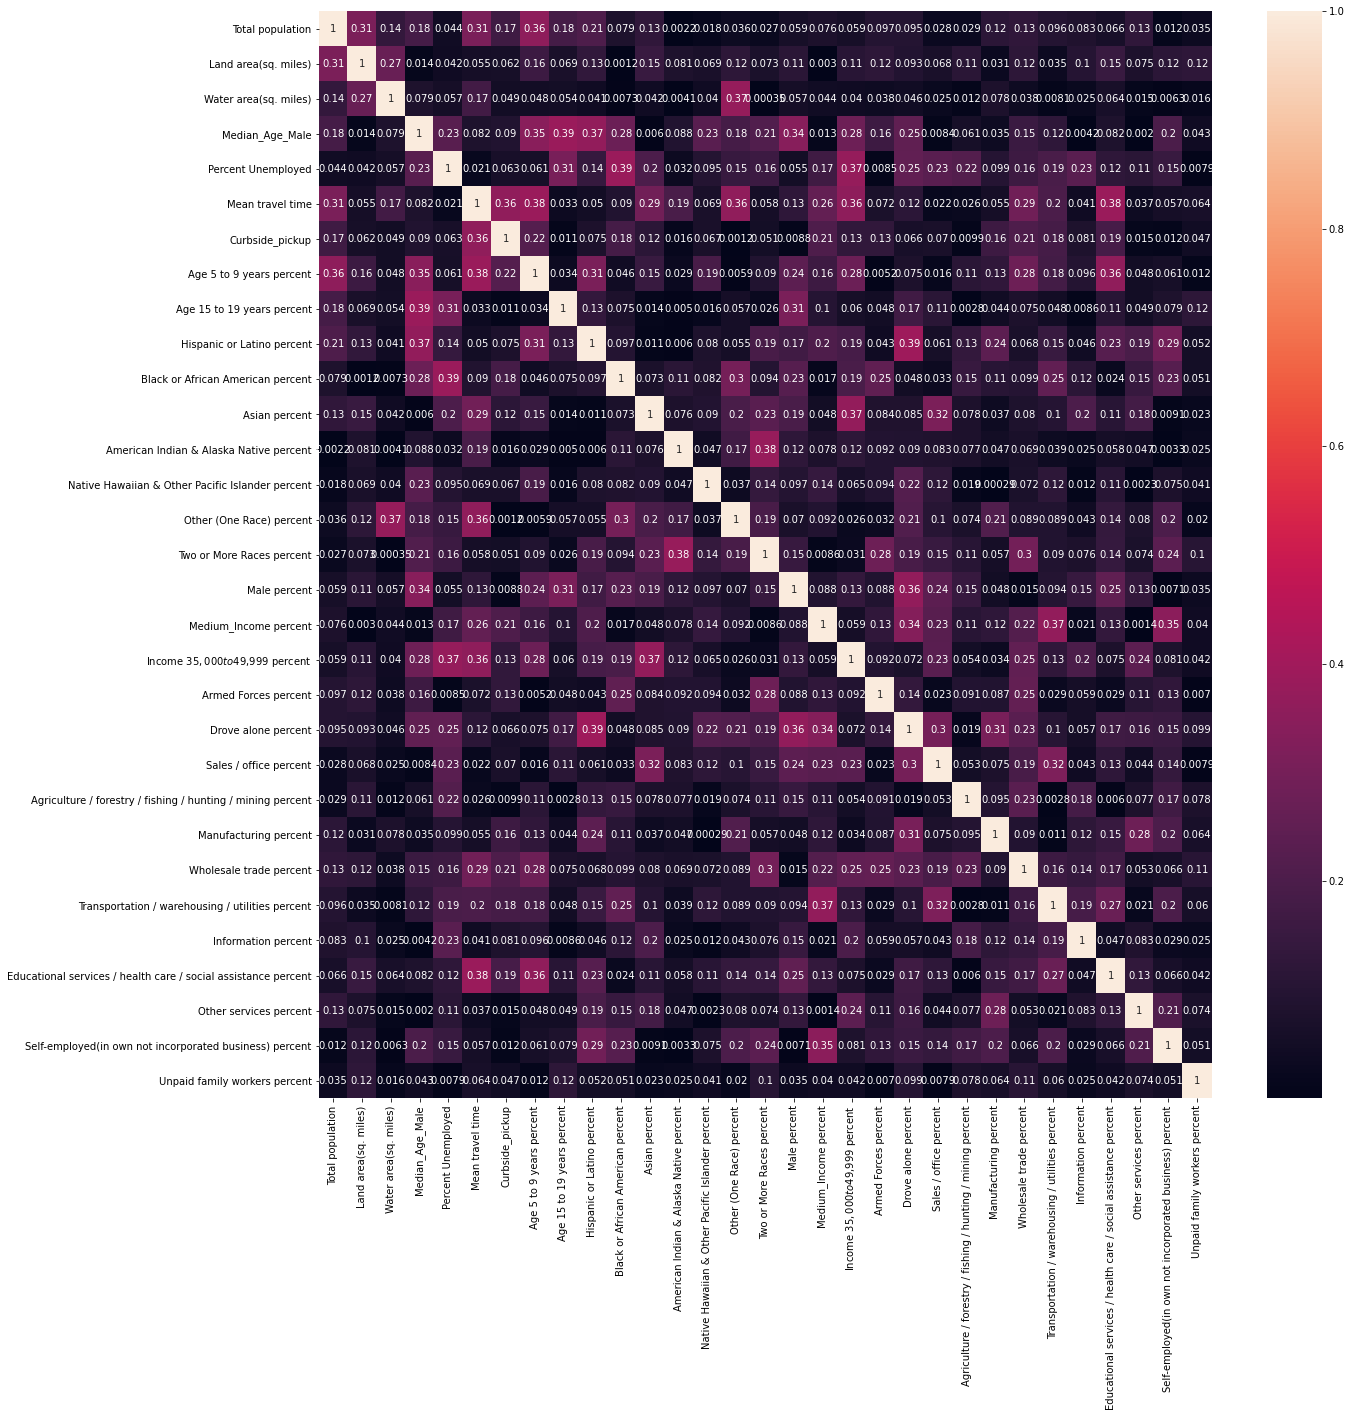

In [59]:
df2 = pd.DataFrame(X[:,mask],columns = np.array(features)[mask])
plt.figure(figsize = (20,20))
sns.heatmap(df2.corr().abs(),annot=True)

In [61]:
df2.columns

Index(['Total population', 'Land area(sq. miles)', 'Water area(sq. miles)',
       'Median_Age_Male', 'Percent Unemployed', 'Mean travel time',
       'Curbside_pickup', 'Age 5 to 9 years percent',
       'Age 15 to 19 years percent', 'Hispanic or Latino percent',
       'Black or African American percent', 'Asian percent',
       'American Indian & Alaska Native percent',
       'Native Hawaiian & Other Pacific Islander percent',
       'Other (One Race) percent', 'Two or More Races percent', 'Male percent',
       'Medium_Income percent', 'Income $35,000 to $49,999 percent',
       'Armed Forces percent', 'Drove alone percent', 'Sales / office percent',
       'Agriculture / forestry / fishing / hunting / mining percent',
       'Manufacturing percent', 'Wholesale trade percent',
       'Transportation / warehousing / utilities percent',
       'Information percent',
       'Educational services / health care / social assistance percent',
       'Other services percent',
       'Self

### Number of Stores per year

In [48]:
stores = AHG_data_final['Year'].value_counts().sort_values()
stores = pd.DataFrame(stores).reset_index()
stores.columns = ['Year', 'Store_count']

In [49]:
stores['Year'] = stores['Year'].apply(str)

In [50]:
fig = px.bar(stores, 'Year', 'Store_count', title = 'AHG opened additional stores from 2017 to 2020')
fig.update_xaxes(title = 'Year')
fig.update_yaxes(title = 'Number of Stores')
fig.show()

In [75]:
c = AHG_data_final.groupby('Year')['Sales'].sum()
c = pd.DataFrame(c).reset_index()

In [76]:
c

Year         Sales
0  2017  1.256796e+09
1  2018  1.545030e+09
2  2019  1.819468e+09
3  2020  1.659858e+09

In [79]:
fig = px.bar(c, 'Year', 'Sales', title = 'Total Sales decreased in 2020 due to pandemic')
fig.update_xaxes(title = 'Year')
fig.update_yaxes(title = 'Total Sales')
fig.show()

### Store Distribution by State

In [51]:
State_dist = pd.DataFrame(AHG_data_final.groupby(by = ['State','Year'])['Zipcode'].count())
State_dist.reset_index(inplace=True)


fig = px.bar(State_dist, x = 'State', y = 'Zipcode', color = 'Year',title = 'Texas Dominates the AHG Store Distribution followed by Georgia from 2017')
fig.update_xaxes(title = 'State',tickangle = -45)
fig.update_yaxes(title = 'Number of Stores')
fig.show()

## Stores with highest  sales in 2020

In [52]:
# filtering the 2020 data
AHG_2020_M = AHG_data_final[AHG_data_final.Year == '2020']
AHG_2020_M.index = range(len(AHG_2020_M))

In [53]:
store_avg_sales_overall = pd.DataFrame(AHG_data_final.groupby(by = ['Address'])['Sales'].mean().nlargest(10))
store_avg_sales_overall.reset_index(inplace = True)
store_avg_sales_overall.rename(columns= {'Sales': 'Average Sales'}, inplace= True)

store_tot_sales_overall = pd.DataFrame(AHG_data_final.groupby(by = ['Address'])['Sales'].sum().nlargest(10))
store_tot_sales_overall.reset_index(inplace = True)
store_tot_sales_overall.rename(columns= {'Sales': 'Total Sales'}, inplace= True)

# fig = px.bar(store_sales_overall, x = 'Address', y = 'Sales', color = 'Address',title = 'Top 10 stores with highest sales from 2017 to 2020')
# fig.update_xaxes(title = 'Store Address',tickangle = -40)
# fig.update_yaxes(title = 'Total Sales')
# fig.update_layout(showlegend = False)

In [54]:
fig = make_subplots(rows=1, cols=2)

# Add traces
fig.add_trace(go.Bar(x=store_avg_sales_overall['Address'], y=store_avg_sales_overall['Average Sales']), row=1, col=1)
fig.add_trace(go.Bar(x=store_tot_sales_overall['Address'], y=store_tot_sales_overall['Total Sales']), row=1, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="Average Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)

# Update title and height
fig.update_layout(title_text="Top 10 stores with highest Average and total sales from 2017 - 2020 ", height=500, width = 1100, showlegend = False)

fig.show()

In [55]:
store_avg_sales_overall = pd.DataFrame(AHG_data_final.groupby(by = ['Address'])['Sales'].mean().nlargest(10))
store_avg_sales_overall.reset_index(inplace = True)
store_avg_sales_overall.rename(columns= {'Sales': 'Average Sales'}, inplace= True)

store_tot_sales_overall = pd.DataFrame(AHG_data_final.groupby(by = ['Address'])['Sales'].sum().nlargest(10))
store_tot_sales_overall.reset_index(inplace = True)
store_tot_sales_overall.rename(columns= {'Sales': 'Total Sales'}, inplace= True)


fig = make_subplots(rows=1, cols=2)

# Add traces
fig.add_trace(go.Bar(x=store_avg_sales_overall['Address'], y=store_avg_sales_overall['Average Sales']), row=1, col=1)
fig.add_trace(go.Bar(x=store_tot_sales_overall['Address'], y=store_tot_sales_overall['Total Sales']), row=1, col=2)


# # Update yaxis properties
fig.update_yaxes(title_text="Average Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)


# # Update title and height
fig.update_layout(title_text="Top 10 stores with highest Average and total sales in 2020 ", height=500, width = 1100, showlegend = False)

fig.show()

## Average sales by state

In [56]:
store_sales_by_state_all = pd.DataFrame(AHG_data_final.groupby(by = ['State'])['Sales'].agg(Avg_sales='mean', Total_stores='count')).sort_values('Avg_sales', ascending=False)
store_sales_by_state_all.reset_index(inplace = True)

store_sales_by_state_2020 = pd.DataFrame(AHG_2020_M.groupby(by = ['State'])['Sales'].agg(Avg_sales='mean', Total_stores='count')).sort_values('Avg_sales', ascending=False)
store_sales_by_state_2020.reset_index(inplace = True)


In [57]:
fig = make_subplots(rows=2, cols=1)

# Add traces
fig.add_trace(go.Bar(x=store_sales_by_state_all['State'], y=store_sales_by_state_all['Avg_sales']), row=1, col=1)
fig.add_trace(go.Bar(x=store_sales_by_state_2020['State'], y=store_sales_by_state_2020['Avg_sales']), row=2, col=1)

# 
fig.update_xaxes(tickangle = -45)


# Update yaxis properties
fig.update_yaxes(title_text="Average Sales Overall", row=1, col=1)
fig.update_yaxes(title_text="Average Sales in 2020", row=2, col=1)


# Update title and height
fig.update_layout(title_text="States with highest Average sales overall and in 2020 ", height=600, width = 1000, showlegend = False)
fig.show()

### Does homeowners are likely to buy more home furnishing products compared to renters in the area?

In [58]:
fig = make_subplots(rows=2, cols=2)

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['Owner-occupied percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Renter-occupied percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['Family households percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Nonfamily households percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Owner-occupied (%)", row=1, col=1)
fig.update_xaxes(title_text="Renter-occupied (%)", row=1, col=2)
fig.update_xaxes(title_text="Family households (%)", row=2, col=1)
fig.update_xaxes(title_text="Nonfamily households (%)", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)
fig.update_yaxes(title_text="Total Sales", row=2, col=1)
fig.update_yaxes(title_text="Total Sales", row=2, col=2)


# Update title and height
fig.update_layout(title_text="Correlations for Total sales in 2020 ", height=550, showlegend = False)

fig.show()

The above graph shows the scatter plot between Percent of Owner occupied housing units and sales in the area. As we can see most of the areas has **>60%** of homes are owner occupied and **<40%** are renter occupied. And there is no correlation 

### Does high income people( >100k ) contribute more to AHG store sales?

In [59]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Income level below 50k", "Income Level 50k - 100k", "Income level above 100k"))

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['Low_Income percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Medium_Income percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['High_Income percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Population with Low income", row=1, col=1)
fig.update_xaxes(title_text="Population with Medium Income", row=1, col=2)
fig.update_xaxes(title_text="Population with High Income", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)
fig.update_yaxes(title_text="Total Sales", row=2, col=1)


# Update title and height
fig.update_layout(title_text="Correlations between Population with Income level vs Total sales ", height=600, showlegend = False)

fig.show()

## How does age of customers affect the sales?


In [60]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Age below 20", "Age 20 - 55", "Age above 55"))

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['minor percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['adults percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['senior percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Minor", row=1, col=1)
fig.update_xaxes(title_text="Adults", row=1, col=2)
fig.update_xaxes(title_text="Senior", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)
fig.update_yaxes(title_text="Total Sales", row=2, col=1)


# Update title and height
fig.update_layout(title_text="Correlations between Population with Age vs Total sales ", height=800, showlegend = False)

fig.show()

### How does gender plays a role in store sales?

In [61]:
fig = make_subplots(rows=1, cols=2)

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['Male percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Female percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)


# Update xaxis properties
fig.update_xaxes(title_text="Male", row=1, col=1)
fig.update_xaxes(title_text="Female", row=1, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)


# Update title and height
fig.update_layout(title_text="Correlations between Gender vs Total sales ", height=400, showlegend = False)

fig.show()

### which ethnic groups contribute more to store sales?

In [62]:
fig = make_subplots(rows=2, cols=2)

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['White percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Hispanic or Latino percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['Black or African American percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Asian percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="White count", row=1, col=1)
fig.update_xaxes(title_text="Hispanic or Latino count", row=1, col=2)
fig.update_xaxes(title_text="Black or African American count", row=2, col=1)
fig.update_xaxes(title_text="Asian count", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)
fig.update_yaxes(title_text="Total Sales", row=2, col=1)
fig.update_yaxes(title_text="Total Sales", row=2, col=2)


# Update title and height
fig.update_layout(title_text="Correlations between Ethinicity vs Total sales ", height=800, showlegend = False)

fig.show()

In [63]:
fig = make_subplots(rows=2, cols=2)

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['American Indian & Alaska Native percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Native Hawaiian & Other Pacific Islander percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['Other (One Race) percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Two or More Races percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="American Indian & Alaska Native count", row=1, col=1)
fig.update_xaxes(title_text="Native Hawaiian & Other Pacific Islander count", row=1, col=2)
fig.update_xaxes(title_text="Other (One Race) count", row=2, col=1)
fig.update_xaxes(title_text="Two or More Races count", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)
fig.update_yaxes(title_text="Total Sales", row=2, col=1)
fig.update_yaxes(title_text="Total Sales", row=2, col=2)


# Update title and height
fig.update_layout(title_text="Correlations between Ethinicity vs Total sales ", height=800, showlegend = False)

fig.show()

In [83]:
fig = make_subplots(rows=3, cols=3,subplot_titles=("White", "Hispanic or Latino", "Black or African American" , "Asian" , "American Indian & Alaska Native" , "Native Hawaiian & Other Pacific Islander" , "Other (One Race)", "Two or More Races"))

# Add traces
fig.add_trace(go.Scatter(x=AHG_2020_M['White percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Hispanic or Latino percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['Black or African American percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=1, col=3)
fig.add_trace(go.Scatter(x=AHG_2020_M['Asian percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['American Indian & Alaska Native percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=2)
fig.add_trace(go.Scatter(x=AHG_2020_M['Native Hawaiian & Other Pacific Islander percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=2, col=3)
fig.add_trace(go.Scatter(x=AHG_2020_M['Other (One Race) percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=3, col=1)
fig.add_trace(go.Scatter(x=AHG_2020_M['Two or More Races percent'], y=AHG_2020_M['Sales'], mode = 'markers', hovertext = AHG_2020_M['Zipcode']), row=3, col=2)



# Update xaxis properties
fig.update_xaxes(title_text="White population", row=1, col=1)
fig.update_xaxes(title_text="Hispanic or Latino population", row=1, col=2)
fig.update_xaxes(title_text="Black or African American population", row=1, col=3)
fig.update_xaxes(title_text="Asian population", row=2, col=1)
fig.update_xaxes(title_text="American Indian & Alaska Native population", row=2, col=2)
fig.update_xaxes(title_text="Native Hawaiian & Other Pacific Islander population", row=2, col=3)
fig.update_xaxes(title_text="Other (One Race) population", row=3, col=1)
fig.update_xaxes(title_text="Two or More Races population", row=3, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Total Sales", row=1, col=1)
fig.update_yaxes(title_text="Total Sales", row=1, col=2)
fig.update_yaxes(title_text="Total Sales", row=1, col=3)
fig.update_yaxes(title_text="Total Sales", row=2, col=1)
fig.update_yaxes(title_text="Total Sales", row=2, col=2)
fig.update_yaxes(title_text="Total Sales", row=2, col=3)
fig.update_yaxes(title_text="Total Sales", row=3, col=1)
fig.update_yaxes(title_text="Total Sales", row=3, col=2)


# Update title and height
fig.update_layout(title_text="Correlations between Ethnicity vs Total sales ", height=700, showlegend = False)

fig.show()

## Feature selection using Random forest

In [65]:
drop_cols = ['Year','Zipcode','Name','Address','State','City']
AHG = AHG_data_final.drop(columns=drop_cols)

X = AHG.drop('Sales', axis=1)
y = AHG['Sales']

In [66]:
X = AHG.drop('Sales', axis=1)
y = AHG['Sales']

rf_reg = RandomForestRegressor()
rf = rf_reg.fit(X,y)

fimp_col = []
fimp = []
for i,column in enumerate(X):
    fimp_col.append(column)
    fimp.append(rf.feature_importances_[i])
    
fimp_df = pd.DataFrame(zip(fimp_col,fimp), columns = ['Features', 'Feature Importance'])
fimp_df = fimp_df.sort_values('Feature Importance', ascending = False).reset_index()

fimp_df['F_imp_cumulative'] = fimp_df['Feature Importance'].cumsum()
fimp_df

index                                           Features  \
0      74   Public transportation(excluding taxicab) percent   
1      69                         Not in labor force percent   
2      91  Professional / scientific / management / admin...   
3      67                       Civilian labor force percent   
4      98  Self-employed(in own not incorporated business...   
5      36                                     adults percent   
6      13                         Workers(16 years and over)   
7      14                                   Mean travel time   
8      90  Finance / insurance / real estate / rental / l...   
9      92  Educational services / health care / social as...   
10     11                      Population(16 years and over)   
11     39                         Hispanic or Latino percent   
12     96              Private wage & salary workers percent   
13     80                             Sales / office percent   
14     28                         Age 35 to 44 years percent   
15     77                             Worked at home percent   
16     86                            Wholesale trade percent   
17     97                         Government workers percent   
18     76                                Other means percent   
19     83  Agriculture / forestry / fishing / hunting / m...   
20     93  Arts / entertainment / recreation / accommodat...   
21     85                              Manufacturing percent   
22     84                               Construction percent   
23     88   Transportation / warehousing / utilities percent   
24     38                                      White percent   
25      2                       Density(people per sq. mile)   
26     45                          Two or More Races percent   
27     41                                      Asian percent   
28     25                         Age 15 to 19 years percent   
29     72                                Drove alone percent   
30      0                                   Total population   
31     75                                     Walked percent   
32     40                  Black or African American percent   
33     56                  Income $50,000 to $74,999 percent   
34     89                                Information percent   
35     18  Percentage of people whose income in the past ...   
36     30                         Age 55 to 59 years percent   
37     64                       Vacant housing units percent   
38     87                               Retail trade percent   
39     27                         Age 25 to 34 years percent   
40     53                  Income $15,000 to $24,999 percent   
41     49                              Medium_Income percent   
42     37                                     senior percent   
43     79                                    Service percent   
44     95                             Other services percent   
45      1                               Land area(sq. miles)   
46     62                       Nonfamily households percent   
47      9                                Total housing units   
48     24                         Age 10 to 14 years percent   
49      7                             Average household size   
50     73                                  Carpooled percent   
51      3                              Water area(sq. miles)   
52     61                          Family households percent   
53     63                     Occupied housing units percent   
54     51                   Income Less than $10,000 percent   
55     71                                 Unemployed percent   
56     94                      Public administration percent   
57     55                  Income $35,000 to $49,999 percent   
58     31                         Age 60 to 64 years percent   
59     15    Civilian employed population(16 years and over)   
60     81  Natural resources / construction / maintenance...   
61     60                    Income 

C:\Users\srt90\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Important Features')

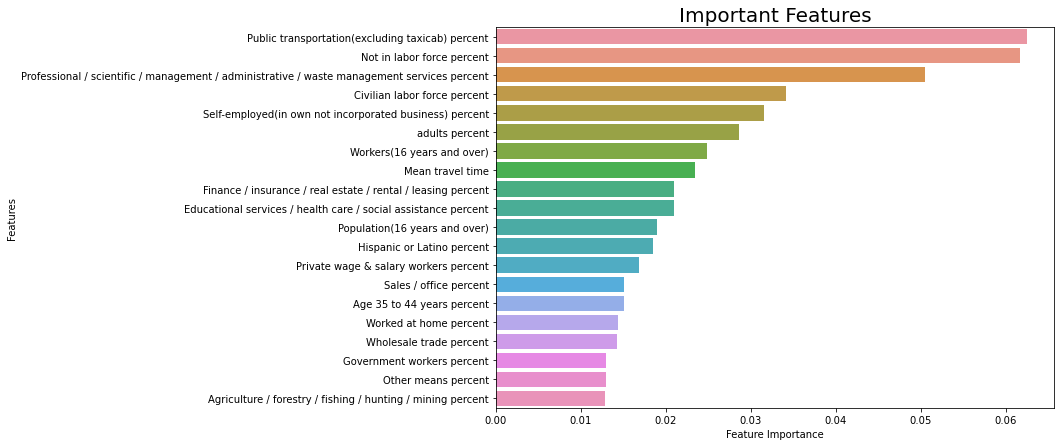

In [67]:
# top 10 features based on feature importance
plt.figure(figsize = (10,7))
sns.barplot('Feature Importance','Features', data = fimp_df[:20])
plt.title('Important Features',size = 20)

## Sales Prediction on stores

In [62]:
drop_cols = ['Year','Zipcode','Name','Address','State','City']
AHG = AHG_data_final.drop(columns=drop_cols)
AHG = AHG[['Total population', 'Land area(sq. miles)', 'Water area(sq. miles)',
       'Median_Age_Male', 'Percent Unemployed', 'Mean travel time',
       'Curbside_pickup', 'Age 5 to 9 years percent',
       'Age 15 to 19 years percent', 'Hispanic or Latino percent',
       'Black or African American percent', 'Asian percent',
       'American Indian & Alaska Native percent',
       'Native Hawaiian & Other Pacific Islander percent',
       'Other (One Race) percent', 'Two or More Races percent', 'Male percent',
       'Medium_Income percent', 'Income $35,000 to $49,999 percent',
       'Armed Forces percent', 'Drove alone percent', 'Sales / office percent',
       'Agriculture / forestry / fishing / hunting / mining percent',
       'Manufacturing percent', 'Wholesale trade percent',
       'Transportation / warehousing / utilities percent',
       'Information percent',
       'Educational services / health care / social assistance percent',
       'Other services percent',
       'Self-employed(in own not incorporated business) percent',
       'Unpaid family workers percent']]

In [66]:
X = AHG
y = AHG_data_final['Sales']

In [67]:
mm = MinMaxScaler() # scaling the data using min-max scaler 
X = mm.fit_transform(X)

In [68]:
# Algorithms
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()
xgb = XGBRegressor()

# parameters
algo_list = list([lin_reg,rf_reg, xgb])
algo_name = list(['Linear regression','Random Forest', 'XgBoost'])
performance_metrics = list(['Mean Absolute Error', 'Mean Squared error','Root Mean squared error','R squared'])

In [69]:
# training on various algorithms
def model(algo,X_train,y_train,X_test,y_test):
    
    algo_performance = []
    
    for i in algo:
        reg = i.fit(X_train, y_train)
        y_pred = reg.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        metrics = dict(zip(performance_metrics,[mae,mse,rmse,r2]))
        algo_performance.append(metrics)
    return algo_performance

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [71]:
result = model(algo_list,X_train,y_train,X_test,y_test) ## 7:10 pm

In [72]:
model_scores = dict(zip(algo_name,result))
model_scores

{'Linear regression': {'Mean Absolute Error': 2270774.4685788834,
  'Mean Squared error': 8237769902176.062,
  'Root Mean squared error': 2870151.5469006267,
  'R squared': 0.1764323551040673},
 'Random Forest': {'Mean Absolute Error': 1438554.377377771,
  'Mean Squared error': 4152108425839.7056,
  'Root Mean squared error': 2037672.305803783,
  'R squared': 0.5848946743804935},
 'XgBoost': {'Mean Absolute Error': 1515682.3299343395,
  'Mean Squared error': 5285926367463.317,
  'Root Mean squared error': 2299114.2571571595,
  'R squared': 0.4715416937786622}}

In [75]:
model_scores = dict(zip(algo_name,result))
model_scores

{'Linear regression': {'Mean Absolute Error': 1922851.0509803772,
  'Mean Squared error': 6006735923082.822,
  'Root Mean squared error': 2450864.3216389646,
  'R squared': 0.3994790560515237},
 'Random Forest': {'Mean Absolute Error': 1412795.5419486642,
  'Mean Squared error': 4005250190644.6455,
  'Root Mean squared error': 2001312.1172482432,
  'R squared': 0.5995767658117216},
 'XgBoost': {'Mean Absolute Error': 1524697.4163158492,
  'Mean Squared error': 5295179786019.889,
  'Root Mean squared error': 2301125.7649289593,
  'R squared': 0.47061658707886733}}

## K-means clustering

In [76]:
def k_means(data,k):
    clustering_score = []
    for i in range(1, k+1):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(data)
        clustering_score.append(kmeans.inertia_) 
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1, k+1), clustering_score)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Clustering Score')
    plt.show()

C:\Users\srt90\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



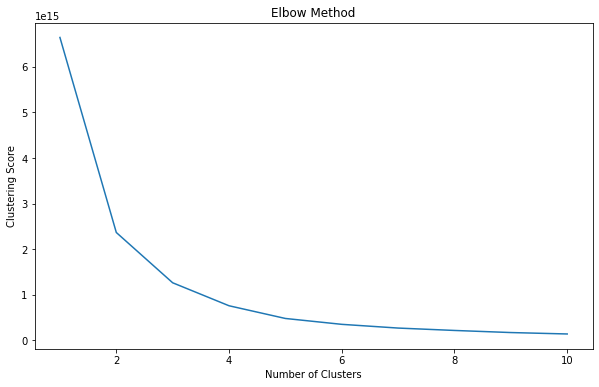

In [77]:
#cols = list(fimp_df['Features'][:60].values)
drop_cols = ['Year','Zipcode','Name','Address','State','City']
AHG = AHG_data_final.drop(columns=drop_cols)
k_means(AHG,10)

In [79]:
# fitting kmeans with the optimum k value selected from elbow method
#data = AHG_2020_M[cols]
drop_cols = ['Year','Zipcode','Name','Address','State','City']
AHG20 = AHG_2020_M.drop(columns=drop_cols)
kmeans = KMeans(n_clusters=4,init = 'k-means++',random_state=42)
kmeans.fit(AHG20)
pred = kmeans.predict(AHG20)

score = silhouette_score(AHG20, pred)

print(f'Silhouette score is {round(score,4)}')
print('\n')

# checking the count of stores on each cluster
C = Counter(pred)
print(C)

AHG20['Cluster'] = pd.DataFrame(pred, columns = ['cluster'])
# fig = px.scatter(cluster_df, x="adults percent", y="Sales", color="Cluster", hover_data=['zipcode'])
# fig.update_layout(title = 'Store Clusters based on adults population using Kmeans')

AHG_2020_M['Cluster'] = AHG20['Cluster']
AHG_2020_M['Cluster'] = AHG_2020_M['Cluster'].apply(str)



Silhouette score is 0.557


Counter({2: 84, 1: 62, 0: 42, 3: 18})


<ipython-input-79-167c4f756c2a>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-167c4f756c2a>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
AHG_2020_M['Cluster'].isnull().sum()

0

In [82]:
# two clusters
AHG_2020_M.to_excel('AHG_4_cluster.xlsx',index=False)